# INTRODUCTION

This model uses a data set to predict if a patient has a heart disease or not

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import os

## Read Dataset

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Data contains;

    age - age in years
    sex - (1 = male; 0 = female)
    cp - chest pain type
    trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    chol - serum cholestoral in mg/dl
    fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    restecg - resting electrocardiographic results
    thalach - maximum heart rate achieved
    exang - exercise induced angina (1 = yes; 0 = no)
    oldpeak - ST depression induced by exercise relative to rest
    slope - the slope of the peak exercise ST segment
    ca - number of major vessels (0-3) colored by flourosopy
    thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
    target - have disease or not (1=yes, 0=no)

In [4]:
df.shape[0]

1025

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Exploratory Data Analysis

In [6]:
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

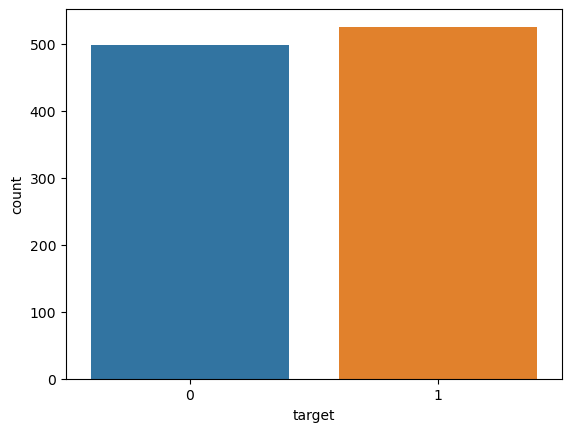

In [7]:
sns.countplot(x="target", data=df)
plt.show

In [8]:
countNoDisease=len(df[df.target == 0])
countHaveDisease=len(df[df.target == 1])

print("percentage of patient having heart disease {:.2f}%".format((countNoDisease/len(df.target)*100)))
print("percentage of patient not having heart disease {:.2f}%".format((countHaveDisease/len(df.target)*100)))


percentage of patient having heart disease 48.68%
percentage of patient not having heart disease 51.32%


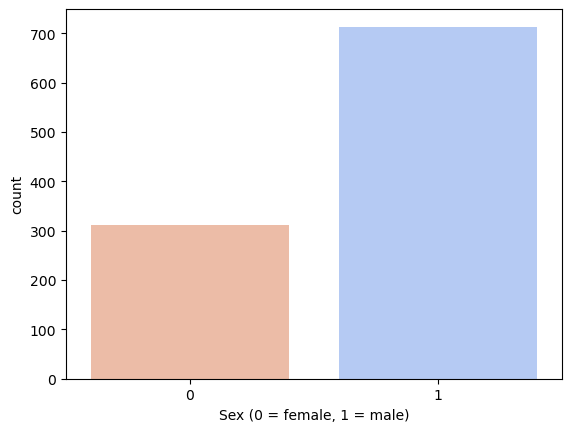

In [9]:
sns.countplot(x='sex', data=df, palette='coolwarm_r')
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

In [10]:
countMale=len(df[df.sex==1])
countFemale=len(df[df.sex==0])

print("percentage of male patients {:.2f}%".format(countMale/len(df.sex)*100))
print("percentage of female patients {:.2f}%".format(countFemale/len(df.sex)*100))

percentage of male patients 69.56%
percentage of female patients 30.44%


In [11]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


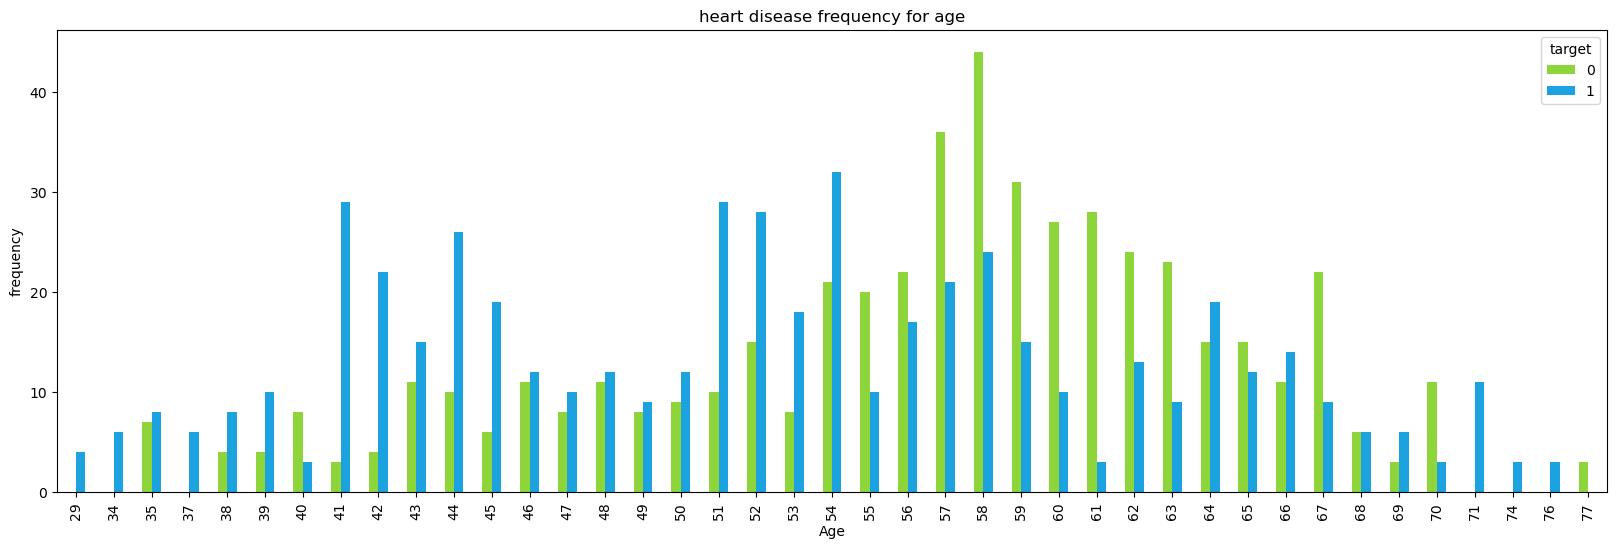

In [12]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20,6), color=['#8ED43B','#1BA2DF'])
plt.title("heart disease frequency for age")
plt.xlabel('Age')
plt.ylabel('frequency')
plt.savefig('heartDisease.png')
plt.show()

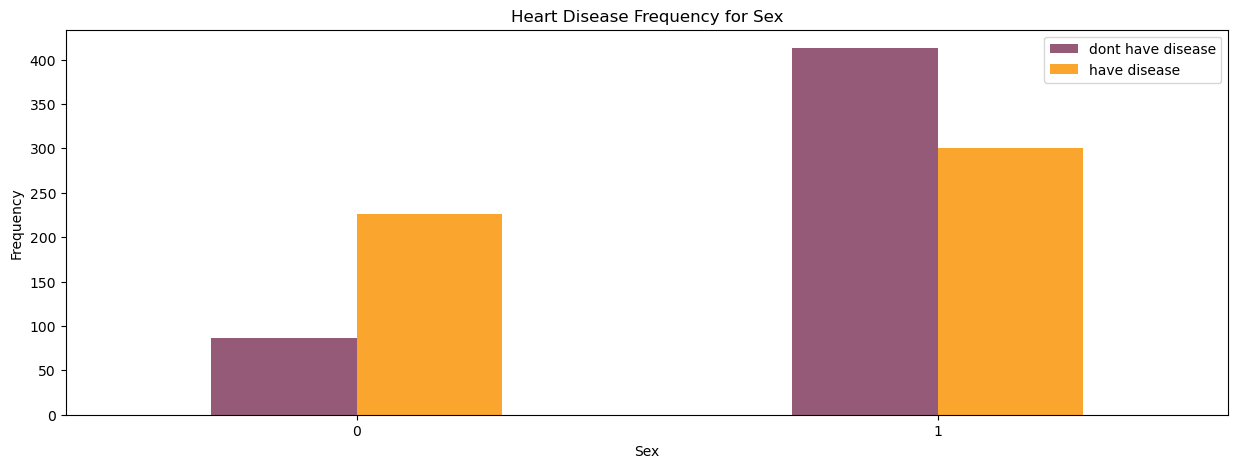

In [13]:
pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(15,5), color=['#955a78','#faa52d'])
plt.legend(["dont have disease", "have disease"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

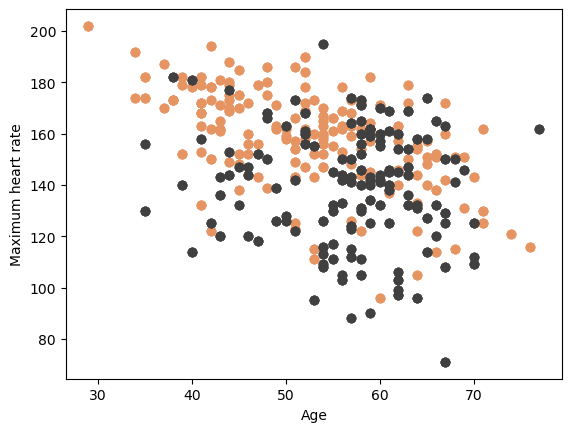

In [14]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[df.target==1], color='#E59462')
plt.scatter(x=df.age[df.target==0], y=df.thalach[df.target==0], color='#404041')
plt.xlabel('Age')
plt.ylabel('Maximum heart rate')
plt.show()

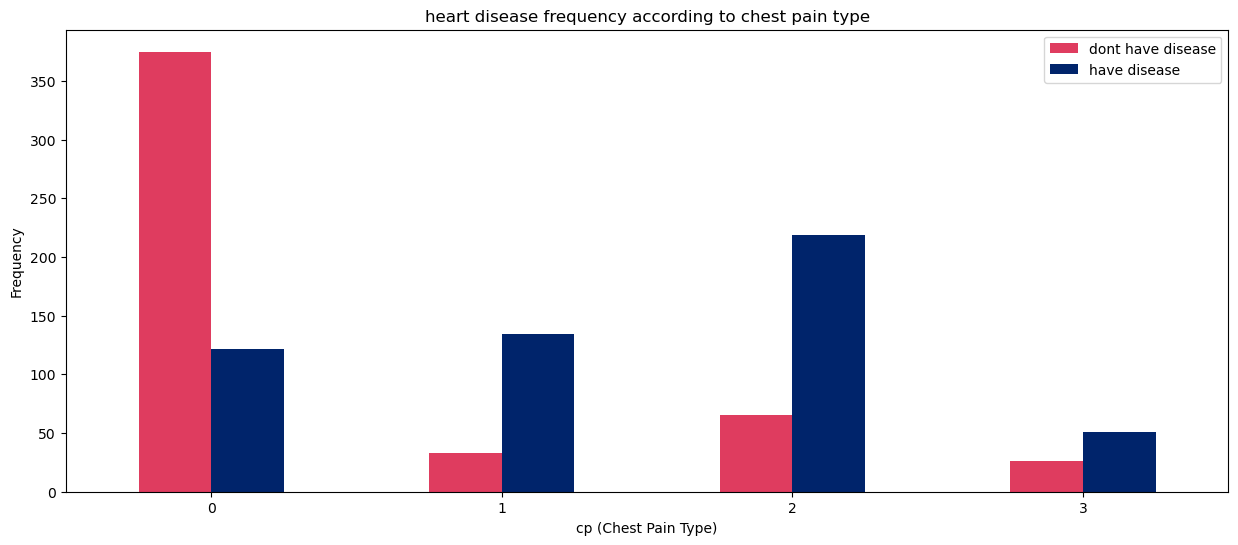

In [15]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(15,6), color=['#DF3C5F', '#00246B'])
plt.xlabel('cp (Chest Pain Type)')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.title('heart disease frequency according to chest pain type')
plt.legend(['dont have disease', 'have disease'])
plt.show()

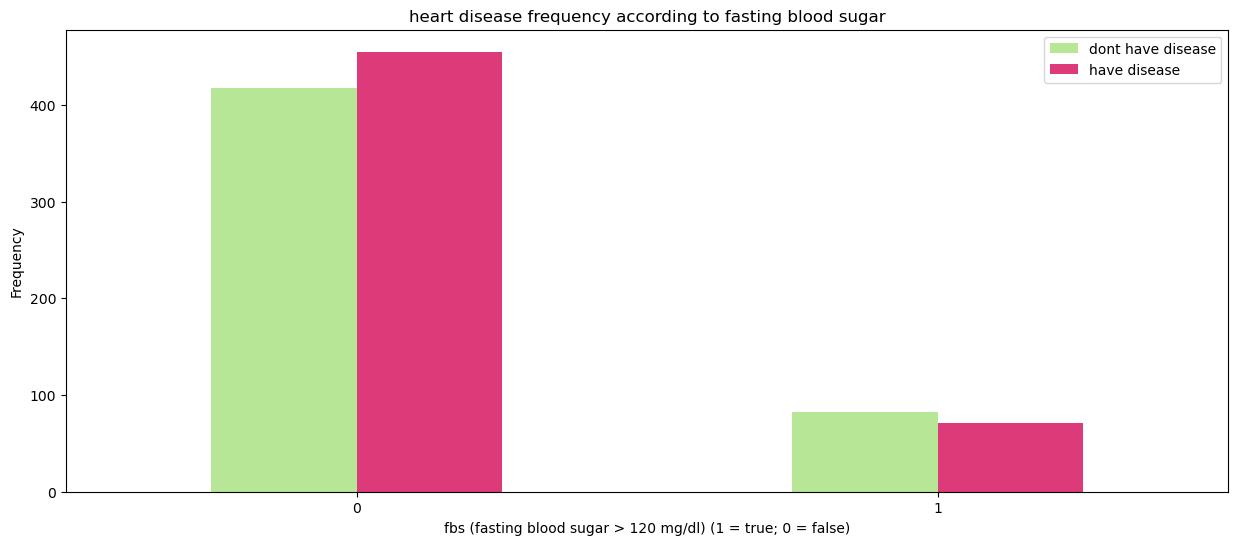

In [16]:
pd.crosstab(df.fbs, df.target).plot(kind='bar', figsize=(15,6), color=['#B6E696','#DC3A79'])
plt.title('heart disease frequency according to fasting blood sugar')
plt.xlabel('fbs (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.legend(['dont have disease', 'have disease'])
plt.show()

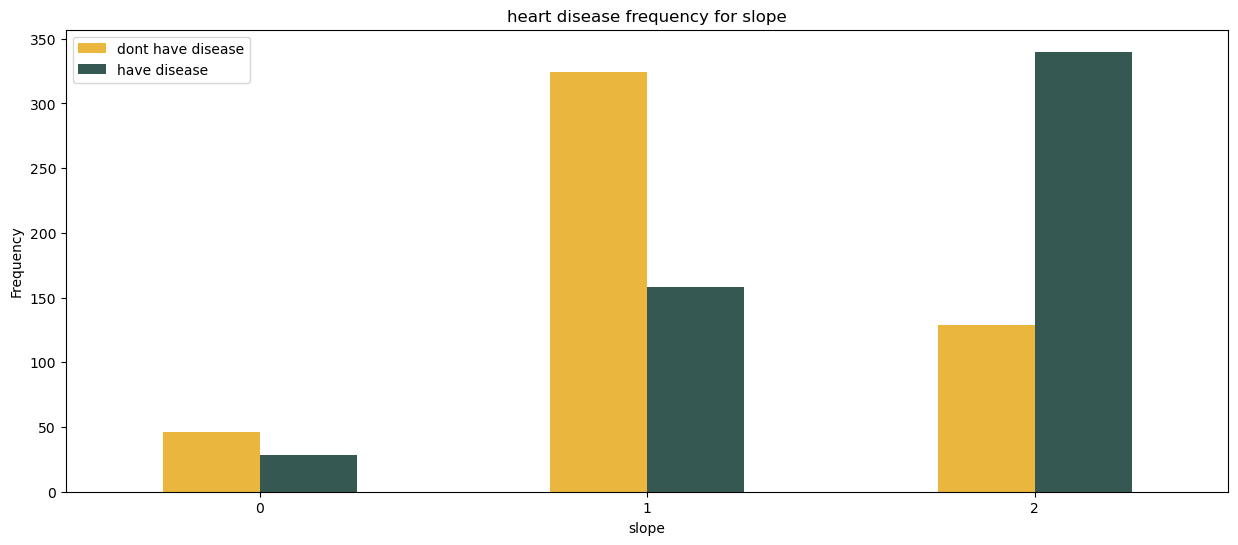

In [17]:
pd.crosstab(df.slope, df.target).plot(kind='bar', figsize=(15,6), color=['#EAB63E','#355952'])
plt.title('heart disease frequency for slope')
plt.xlabel('slope')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.legend(['dont have disease', 'have disease'])
plt.show()

In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

creating dummy variables (one hot encoding)

In [19]:
a=pd.get_dummies(df['cp'], prefix='cp')
b=pd.get_dummies(df['thal'], prefix='thal')
c=pd.get_dummies(df['slope'], prefix='slope')
a = a.astype(int)
b = b.astype(int)
c = c.astype(int)

In [20]:
frames=[df, a, b, c]
df=pd.concat(frames, axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [21]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


## Logistic Regression

First we will train the model manually, then we will us sklearn models

In [22]:
#initialize x and y values

y = df.target.values
x_data = df.drop(['target'], axis=1)

In [23]:
#normalize x

x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

splitting data. 80% data will be training data and remaining will be testing data

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [25]:
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [26]:
def initialize(dimension):

    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [27]:
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

In [28]:
def forwardBackward(weight, bias, x_train, y_train):

    #cost function
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]

    #gradient
    derivative_weight = np.dot(x_train,(y_head-y_train).T) / x_train.shape[1]
    derivative_bias = np.sum((y_head-y_train).T)/x_train.shape[1]
    gradient = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}

    return cost, gradient

In [29]:
def update(weight, bias, x_train, y_train, learningrate, iteration):
    costlist=[]
    index=[]

    for i in range(iteration):
        cost, gradient = forwardBackward(weight, bias, x_train, y_train)
        weight = weight - learningrate*gradient["Derivative Weight"]
        bias = bias - learningrate*gradient["Derivative Bias"]

        costlist.append(cost)
        index.append(i)

    parameter = {"Weight" : weight, "Bias" : bias}

    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costlist)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameter, gradient

In [30]:
def predict(weight, bias, x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_predict = np.zeros((1, x_test.shape[1]))

    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_predict[0,i] = 0
        else:
            y_predict[0,i] = 1
    return y_predict

In [31]:
def logistic_regression(x_train,y_train,x_test,y_test,learningrate,iteration):
    dimension = x_train.shape[0]

    weight,bias = initialize(dimension)

    parameter, gradient = update(weight, bias, x_train, y_train, learningrate, iteration)

    y_predict = predict(parameter["Weight"],parameter["Bias"],x_test)

    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_predict - y_test))*100)))

iteration: 300
cost: 0.6727794995994192


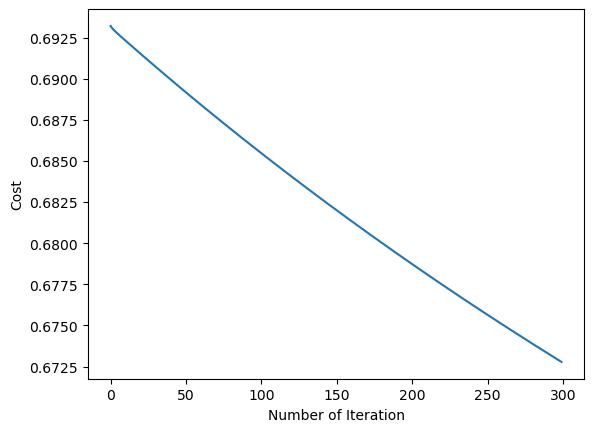

Manuel Test Accuracy: 70.24%


In [32]:
logistic_regression(x_train,y_train,x_test,y_test,1,300)

### sklearn logistic regression

In [33]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 71.71%


### K-Nearest Neighbour (K-NN) classification

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train.T,y_train.T)

x_test_k = np.ascontiguousarray(x_test)

acc_knn=knn.score(x_test_k.T,y_test.T)*100

accuracies['K-NN']=acc_knn
print('Test Accuracy {:.2f}%'.format(acc_knn))

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Test Accuracy 89.02%


### Support Vector Machine Algorithm

In [38]:
from sklearn.svm import SVC

In [39]:
svm=SVC(random_state=1)
svm.fit(x_train.T,y_train.T)

acc=svm.score(x_test.T,y_test.T)*100

accuracies['SVM'] = acc

print('Test Accuracy {:.2f}%'.format(acc))

Test Accuracy 73.90%


### Decision Tree Algorithm

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 96.34%


### Random Forest Algorithm

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 99.27%


##  Comparison module

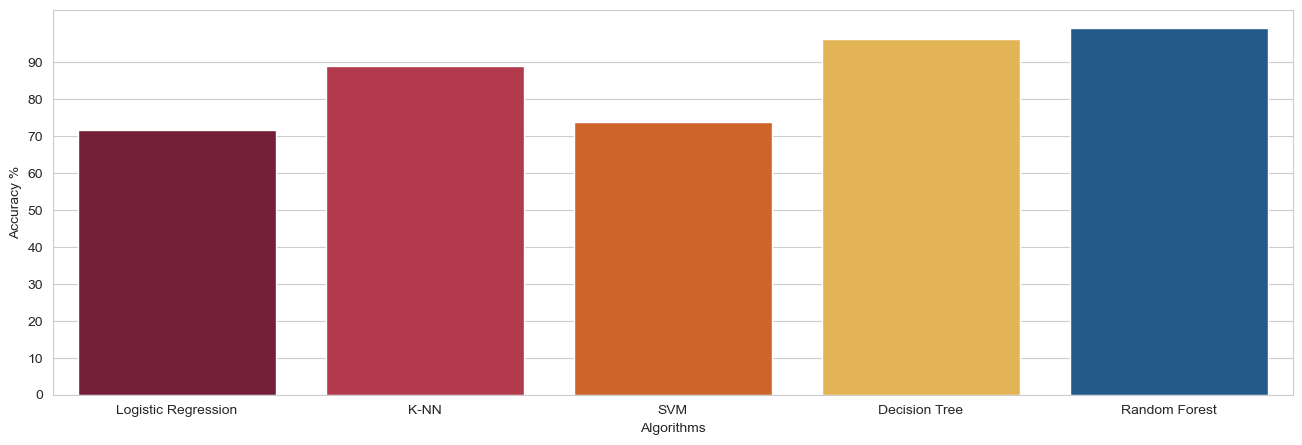

In [42]:
colors = ["#821131", "#C7253E", "#E85C0D","#FABC3F","#125B9A"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()


## Confusion matrix

In [44]:
y_head_lr = lr.predict(x_test.T)
y_head_knn = knn.predict(x_test_k.T)
y_head_svm = svm.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [45]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

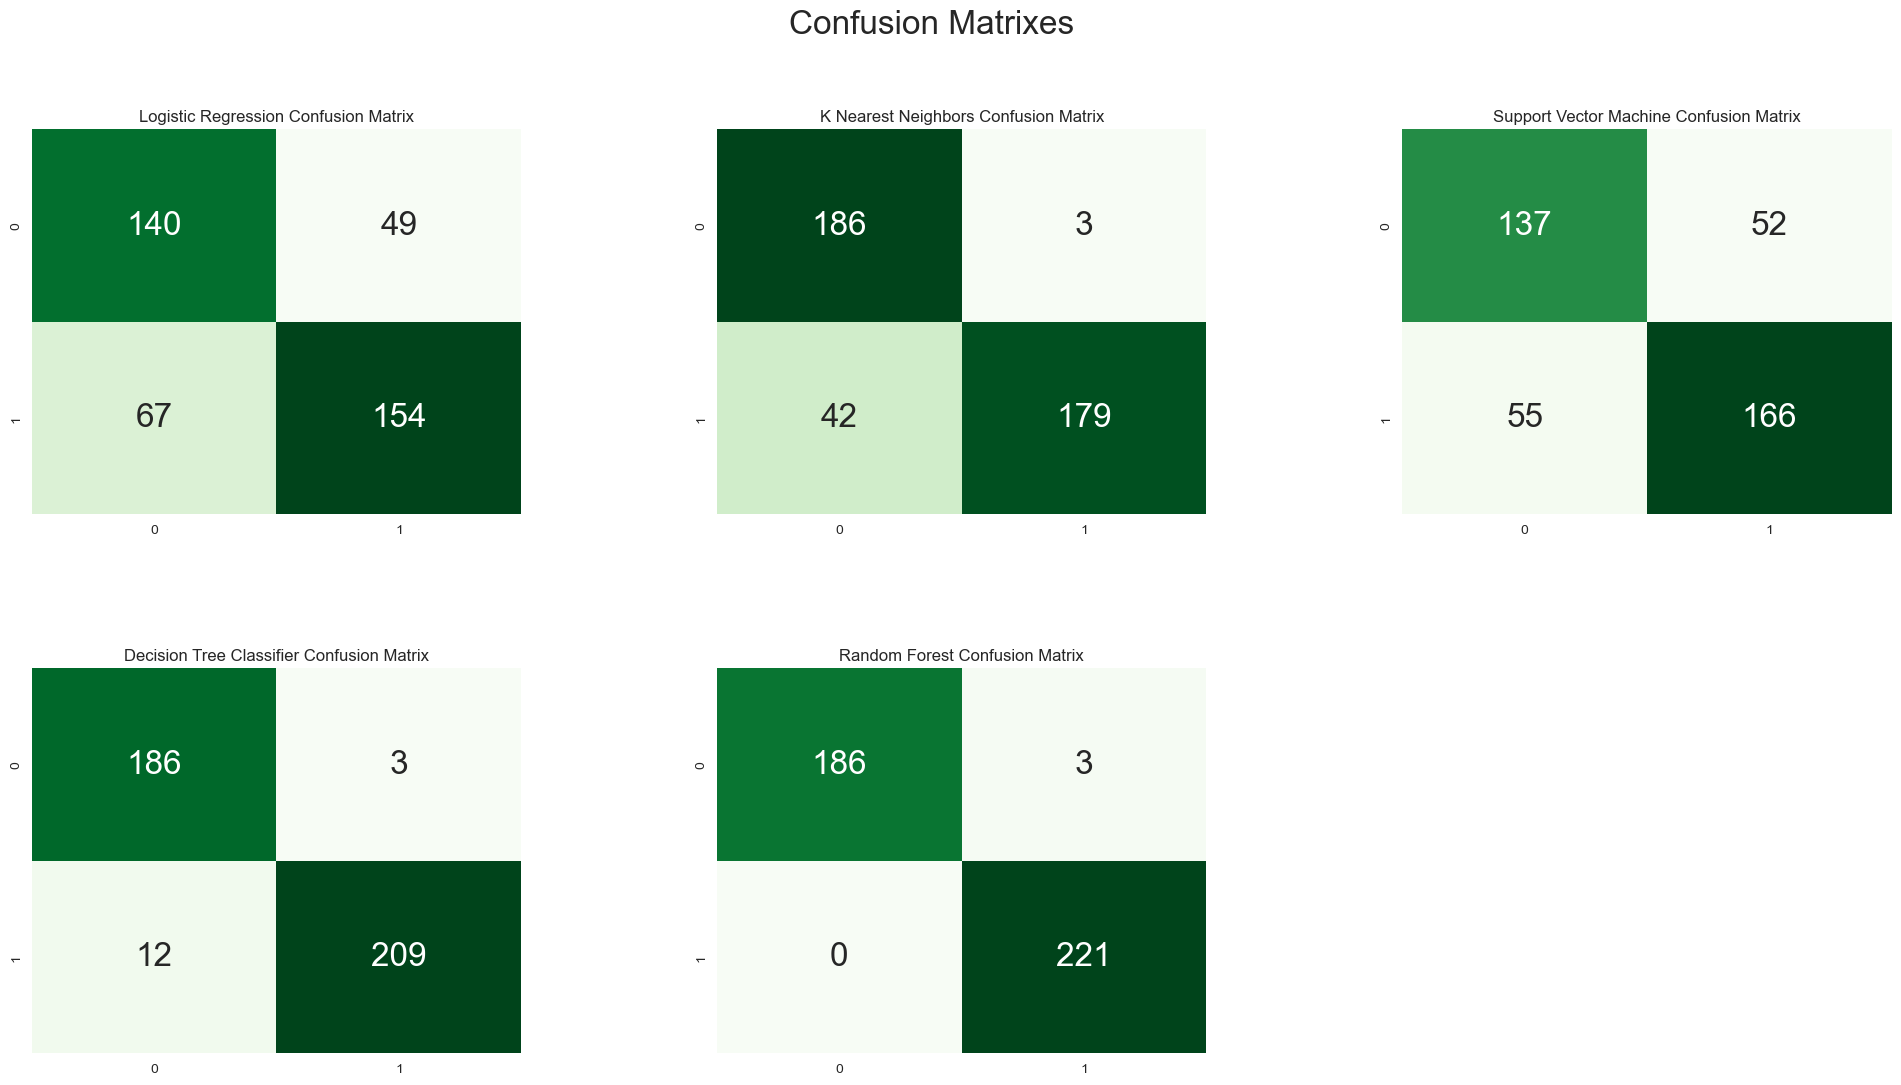

In [46]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

Our models work fine but best of them are Decision Tree and Random Forest.
